In [1]:
# Charged scalar field in axial-symetric spacetime

In [209]:
import numpy as np
import sympy as sy
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import math
from math import *
import scipy as sp
from scipy.integrate import odeint

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [210]:
def Kerr_without_emf(u, l,m,k,j,omega,alp,lam):

    v = u[0]
    w = u[1]
  
    Gam=l**2-2*l+alp**2
    gamma =math.atan(alp/l)
     
    dv_dl = w
    dw_dl = (1/Gam)*((2-2*l)*w+(k*(k+1)-(alp**2*(j**2+2*l*omega**2)-4*alp*j*omega*l+2*l**3*omega**2)/Gam)*v+(alp*l/gamma)*(lam*v**2+m**2-omega**2)*v)
    return [dv_dl, dw_dl]

def Kerr_with_emf(u, l,M,m,k,j,omega,theta,e,alp,lam):
    v = u[0]
    w = u[1]
    x = u[2]
    y = u[3]
    z = u[4]
    q = u[5]
    
    if theta==math.pi/2:
        ss=1
        s=0
        c=0
        cc=-1
        c4=1
    elif theta==math.pi:
        ss=0
        s=0
        c=-1
        cc=1
        c4=1
    elif theta==0:
        ss=0
        s=0
        c=1
        c=1
        c4=1
    else:
        ss=math.sin(theta)
        s=math.sin(2*theta)
        c=math.cos(theta)
        cc=math.cos(2*theta)
        c4=math.cos(4*theta)
  
    Gam=l**2-2*l+alp**2
    f=(l**2-2*l+alp**2*c**2)/(l**2+alp**2*c**2)
    K=(l**2-2*l+alp**2*c**2)/Gam
    Om=2*alp*l*ss**2/(l**2-2*l+alp**2*c**2)
    cons=e*l**2*M**4*v**2/(m**2)
    gtt=-1/f+f*Om**2/(Gam*ss**2)
    gtp=f*Om/(Gam*ss**2)
    #gtp=0
    gpp=f/(Gam*ss**2)
    
    dv_dl = w
    dw_dl = (1/Gam)*((2-2*l)*w+k*(k+1)*v-(j**2-K*(j+e*(f*Om*x+(Gam*ss**2/f-f*Om**2)*z)+Om*(omega+e*(-f*x+f*Om*z)))**2)*v/(ss**2)-(K/f)*((Gam/f)*(omega+e*(-f*x+f*Om*z))**2-Gam*(m**2+lam*v**2))*v)
    dx_dl = y
    dy_dl = (1/Gam)*((2-2*l)*y+cons*(gtt*omega+e*x))
#    dy_dl = (1/Gam)*((2-2*l)*y+cons*(gtt*omega+gtp*j+e*x))
    dz_dl = q
    dq_dl = (1/Gam)*((2-2*l)*q+2*z+cons*(gpp*j+e*z))
#    dq_dl = (1/Gam)*((2-2*l)*q+2*z+cons*(gtp*omega+gpp*j+e*z))
    return [dv_dl, dw_dl,dx_dl, dy_dl, dz_dl, dq_dl]

def real_emf(l,Emon,Adip,dA_dip):
    j=len(dA_dip)
    On=np.ones(j)
    C_1_E=Emon[j-1]*On
    C_1_Adip=dA_dip[j-1]*On
    
    Emon2=Emon-C_1_E
    Adip20=Adip-l*dA_dip[j-1]
    dA_dip2=dA_dip-C_1_Adip
    
    Adip2=Adip20-Adip20[j-1]*On
    
    return Emon2, Adip2, dA_dip2

def Energy_Balance(l,L,M,m,k,j,omega,theta,e,alp,lam,A_E,A_B,dA_B,dA_E):
    
    if theta==math.pi/2:
        ss=1
        s=0
        c=0
        cc=-1
        c4=1
    elif theta==math.pi:
        ss=0
        s=0
        c=-1
        cc=1
        c4=1
    elif theta==0:
        ss=0
        s=0
        c=1
        c=1
        c4=1
    else:
        ss=math.sin(theta)
        s=math.sin(2*theta)
        c=math.cos(theta)
        cc=math.cos(2*theta)
        c4=math.cos(4*theta)
        
    Gam=l**2-2*l+alp**2
    f=(l**2-2*l+alp**2*c**2)/(l**2+alp**2*c**2)
    K=(l**2-2*l+alp**2*c**2)/Gam
    Om=2*alp*l*ss**2/(l**2-2*l+alp**2*c**2)
    g_tt=-f
    g_tp=f*Om
    g_pp=Gam*ss**2/f-f*Om**2
    f1=2*alp*(-l**2+alp**2*c**2)*ss**2/((l**2+alp**2*c**2)**2)
    f2=2*alp*l*(l**2+alp**2)*s/((l**2+alp**2*c**2)**2)
    f3=2*(l**2-alp**2*c**2)/((l**2+alp**2*c**2)**2)
    f4=-4*alp**2*l*c*ss/((l**2+alp**2*c**2)**2)
    f5=((8*l**5+4*alp**2*l**2*(-1+2*l)+alp**4*(1+3*l)+4*alp**2*l*(alp**2+l+2*l**2)*cc+alp**4*(l-1)*c4)*ss**2)/((alp**2+2*l**2+alp**2*cc)**2)
    f6=(alp**2+(l-2)*l+8*l*(alp**2+l**2)**2/((alp**2+2*l**2+alp**2*cc)**2))*s
    #logar=[math.log(1-2/i) for i in l]
    n=L*L
    
    Au_t=A_E
    Au_p=A_B*ss
    Ad_t=g_tt*Au_t+g_tp*Au_p
    Ad_p=g_tp*Au_t+g_pp*Au_p
    
    Au_t_dx=dA_E
    Au_p_dx=dA_B*ss
    Au_p_dt=A_B*c
    Au_t_dt=0
    
    Ad_t_dx=f1*Au_p+g_tp*Au_p_dx-f3*Au_t+g_tt*Au_t_dx
    Ad_t_dt=f2*Au_p+g_tp*Au_p_dt-f4*Au_t+g_tt*Au_t_dt
    Ad_p_dx=f1*Au_t+g_tp*Au_t_dx+f5*Au_p+g_pp*Au_p_dx
    Ad_p_dt=f2*Au_t+f6*Au_p+g_pp*Au_p_dt
    
    vd_t=(omega+e*Ad_t)/m
    vd_p=(j+e*Ad_p)/m

    #Kinetic energy 
    Kin=(f/(2*Gam*ss**2))*(vd_p+Om*vd_t)**2-vd_t**2/(2*f)
    
    #Electromagnetic quantities
    U_E=(1/(2*K*M**4))*(f**2*Om**2/(Gam*ss**2)-1)*(Au_t_dx*Ad_t_dx+Au_p_dx*Ad_p_dx+Au_p_dt*Ad_p_dt/Gam)+(f**2*Om/(Gam*K*ss**2))*Au_t_dx*Ad_p_dx
    P_E=-(1/(K*M**5))*(f**2*Om**2/(Gam*ss**2)-1)*(Ad_t_dx*Au_p_dx+Ad_t_dt*Au_p_dt/Gam)+(f**2*Om/(2*K*Gam*ss**2))*(Ad_t_dx*Au_t_dx-Ad_p_dx*Au_p_dx-Ad_p_dt*Au_p_dt/Gam)
    
    #Energía interna y presión
    p=lam*n**2/(4*m**2)
    U_n=lam*n/(4*m**2)
    
    #Quantum potential
    Lem=j+e*Ad_p+Om*(omega+e*Ad_t)
    U_Q=-(f*Lem**2/(Gam*ss**2)-(1/f)*(omega+e*Ad_t)**2+(m**2+lam*n))
    return Kin,U_E,P_E,p,U_n, U_Q

def U_g_sch(l):
    Gam=l**2-2*l
    U_g=-l**2/Gam
    return U_g

def U_g_kerr_theta(l,theta,alp):
    f=(l**2-2*l+alp**2*math.cos(theta)**2)/(l**2+alp**2*math.cos(theta)**2)
    Om=2*alp*l*math.sin(theta)**2/(l**2-2*l+alp**2*math.cos(theta)**2)
    Gam=l**2-2*l+alp**2
    U_g=-(1/f)*(1-(f**2*Om**2)/(Gam*math.sin(theta)**2))
    return U_g

def U_g_kerr_theta2(l,theta,alp):
    U_g=-((2*l*(alp**2+l**2))/((l**2-2*l*alp**2)*(l**2+alp**2*math.cos(theta)**2))+1)
    return U_g

Definimos nuestros parámetros iniciales

In [211]:
#PARÁMETROS PARA EL CAMPO NO CARGADO. ECUACION DE K-G

m0 = 1
k0 = 0
j0 = 0
omega0 = 1
alp0 = 0.000000000000001
lam0 = 0

params0=(m0,k0,j0,omega0,alp0,lam0)
params01=(m0,k0,j0,omega0,alp0,-2)
params02=(m0,k0,j0,omega0,alp0,-0.5)
params03=(m0,k0,j0,omega0,alp0,1)
params04=(m0,1,j0,omega0,alp0,lam0)
params05=(m0,2,j0,omega0,alp0,lam0)
params06=(m0,3,j0,omega0,alp0,lam0)
params07=(m0,k0,j0,omega0,0.2,lam0)
params08=(m0,k0,j0,omega0,0.5,lam0)
params09=(m0,2,-2,omega0,0.3,lam0)
params010=(m0,2,0,omega0,0.3,lam0)
params011=(m0,2,2,omega0,0.3,lam0)
params012=(m0,2,-2,omega0,-0.3,lam0)
params013=(m0,2,0,omega0,-0.3,lam0)
params014=(m0,2,2,omega0,-0.3,lam0)

# Initial conditions on y, y' at x=0
init0 = 1.0, 0.0

#PARÁMETROS PARA EL SISTEMA COMPLETO M-K-G
M = 0.5
m = 1
k = 0
j = 0
omega = 1
theta = math.pi/2
e = 0.1
alp = 0
lam = -1

paramsch=(M,m,k,j,omega,theta,e,0,lam)
paramsch2=(M,m,2,-2,omega,theta,0,0,lam)
paramsch3=(M,m,2,-2,omega,theta,e,0,lam)
paramsch4=(M,m,2,0,omega,theta,e,0,lam)
paramsch5=(M,m,2,2,omega,theta,e,0,lam)
paramsch6=(M,m,2,2,omega,theta,e,0,lam)
paramsch7=(M,m,2,0,omega,theta,e,0,lam)
paramsch8=(M,m,2,2,omega,theta,e,0,lam)


params=(M,m,k,j,omega,theta,e,alp,lam)
params1=(M,m,k,j,omega,theta,e,0.2,lam)
params2=(M,m,2,-2,omega,theta,0,0.3,lam)
params3=(M,m,k,j,omega,theta,e,0.9,lam)
params4=(M,m,2,-2,omega,theta,e,0.3,lam)
params5=(M,m,2,0,omega,theta,e,0.3,lam)
params6=(M,m,2,2,omega,theta,e,0.3,lam)
params7=(M,m,2,-2,omega,theta,e,-0.3,lam)
params8=(M,m,2,0,omega,theta,e,-0.3,lam)
params9=(M,m,2,2,omega,theta,e,-0.3,lam)
params10=(M,m,2,-2,omega,theta,0,-0.3,lam)

# Initial conditions on y, y' at x=0
init = 1.0, 0.0, 0.0, 0.0, 0.0, 0.0

initial0=1+math.sqrt(1-alp0**2)
initial=1+math.sqrt(1-alp**2)
print initial
end=40
steps=150000
h=(end-initial)/steps

ll = np.linspace(initial0+h,end+h,steps)
l = np.linspace(initial+h,end+h,steps)

2.0


(-100, 0)

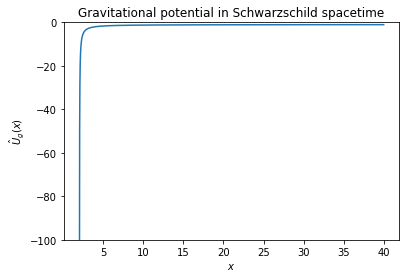

In [212]:
l0 = np.linspace(1,5,10000)
U_g=U_g_sch(l)
plt.plot(ll,U_g)
plt.xlabel('$x$')
plt.ylabel('$\hat U_g(x)$')
plt.title('Gravitational potential in Schwarzschild spacetime')
plt.legend()
plt.ylim([-100,0])

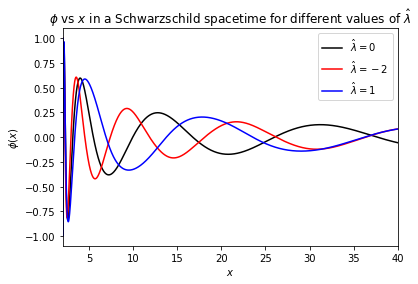

In [213]:
# First integrate from 0 to 2
sol0=odeint(Kerr_without_emf, init0, ll, params0)
sol01=odeint(Kerr_without_emf, init0, ll, params01)
sol02=odeint(Kerr_without_emf, init0, ll, params02)
sol03=odeint(Kerr_without_emf, init0, ll, params03)
sol04=odeint(Kerr_without_emf, init0, ll, params04)
sol05=odeint(Kerr_without_emf, init0, ll, params05)
sol06=odeint(Kerr_without_emf, init0, ll, params06)
sol07=odeint(Kerr_without_emf, init0, ll, params07)
sol08=odeint(Kerr_without_emf, init0, ll, params08)
sol09=odeint(Kerr_without_emf, init0, ll, params09)
sol010=odeint(Kerr_without_emf, init0, ll, params010)
sol011=odeint(Kerr_without_emf, init0, ll, params011)
sol012=odeint(Kerr_without_emf, init0, ll, params012)
sol013=odeint(Kerr_without_emf, init0, ll, params013)
sol014=odeint(Kerr_without_emf, init0, ll, params014)

plt.plot(l, sol0[:,0], color='k',label='$\hat \lambda=0$')
plt.plot(l, sol01[:,0], color='r',label='$\hat \lambda=-2$')
#plt.plot(l, sol02[:,0], color='g',label='Lam=-0.5')
plt.plot(l, sol03[:,0], color='b',label='$\hat \lambda=1$')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Schwarzschild spacetime for different values of $\hat \lambda$')
plt.xlim([initial+2*h,end])
plt.legend()
plt.show()

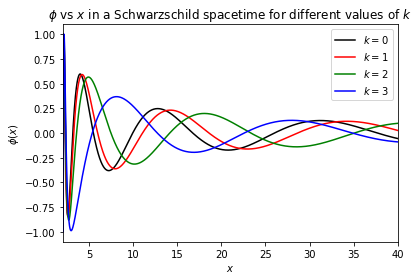

In [214]:
plt.plot(l, sol0[:,0], color='k',label='$k=0$')
plt.plot(l, sol04[:,0], color='r',label='$k=1$')
plt.plot(l, sol05[:,0], color='g',label='$k=2$')
plt.plot(l, sol06[:,0], color='b',label='$k=3$')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Schwarzschild spacetime for different values of $k$')
plt.xlim([initial+2*h,end])
plt.legend()
plt.show()

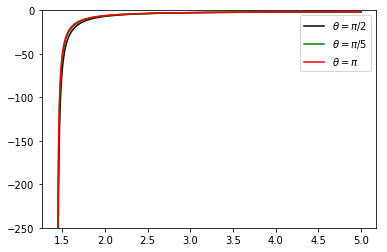

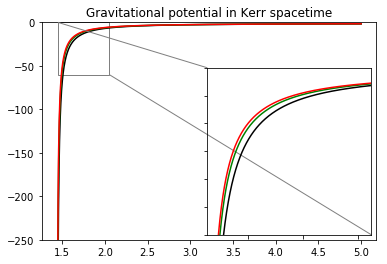

In [215]:
b=0.9
hh=0.001
l2 = np.linspace(1+math.sqrt(1-b**2)+hh,5,5000)
U_g11=U_g_kerr_theta(l2,math.pi/2,b)
U_g21=U_g_kerr_theta(l2,math.pi/5,b)
U_g31=U_g_kerr_theta(l2,math.pi,b)

plt.plot(l2, U_g11,'k',label=r"$\theta =\pi/2$")
plt.plot(l2, U_g21,'g',label=r"$\theta =\pi/5$")
plt.plot(l2, U_g31,'r',label=r"$\theta =\pi$")
plt.legend()
plt.ylim([-250,0])

fig, ax = plt.subplots()
  
ax.plot(l2, U_g11,color='k',label='theta =pi/2')
ax.plot(l2, U_g21,color='g',label='theta =pi/3')
ax.plot(l2, U_g31,color='r',label='theta =pi/5')
ax.set_ylim(-250, 0)
plt.title('Gravitational potential in Kerr spacetime')

axins = zoomed_inset_axes(ax, 3.2, loc=4) # zoom = 6
axins.plot(l2, U_g11,color='k',label='theta =pi/2')
axins.plot(l2, U_g21,color='g',label='theta =pi/2')
axins.plot(l2, U_g31,color='r',label='theta =pi/2')
axins.set_xlim(1.45, 2.05) # Limit the region for zoom
axins.set_ylim(-60, 0)

plt.xticks(visible=False)  # Not present ticks
plt.yticks(visible=False)
#
## draw a bbox of the region of the inset axes in the parent axes and
## connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
plt.show()

In [216]:
# First integrate from 0 to 2
solsch=odeint(Kerr_with_emf, init, l, paramsch)
solsch2=odeint(Kerr_with_emf, init, l, paramsch2)
solsch3=odeint(Kerr_with_emf, init, l, paramsch3)
solsch4=odeint(Kerr_with_emf, init, l, paramsch4)
solsch5=odeint(Kerr_with_emf, init, l, paramsch5)
solsch6=odeint(Kerr_with_emf, init, l, paramsch6)
solsch7=odeint(Kerr_with_emf, init, l, paramsch7)
solsch8=odeint(Kerr_with_emf, init, l, paramsch8)


sol=odeint(Kerr_with_emf, init, l, params)
sol1=odeint(Kerr_with_emf, init, l, params1)
sol2=odeint(Kerr_with_emf, init, l, params2)
sol3=odeint(Kerr_with_emf, init, l, params3)
sol4=odeint(Kerr_with_emf, init, l, params4)
sol5=odeint(Kerr_with_emf, init, l, params5)
sol6=odeint(Kerr_with_emf, init, l, params6)
sol7=odeint(Kerr_with_emf, init, l, params7)
sol8=odeint(Kerr_with_emf, init, l, params8)
sol9=odeint(Kerr_with_emf, init, l, params9)
sol10=odeint(Kerr_with_emf, init, l, params10)

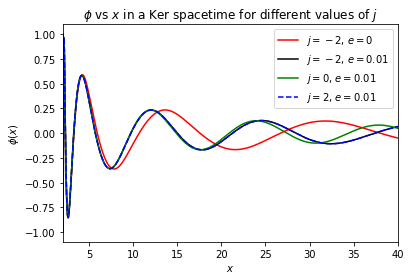

In [217]:
plt.plot(l, solsch2[:,0], 'r',label='$j=-2$, $e=0$')
plt.plot(l, solsch3[:,0], 'k',label='$j=-2$, $e=0.01$')
plt.plot(l, solsch4[:,0], 'g',label='$j=0$, $e=0.01$')
plt.plot(l, solsch5[:,0], 'b--',label='$j=2$, $e=0.01$')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Ker spacetime for different values of $j$')
plt.xlim([initial+2*h,25])
plt.legend()
plt.xlim([initial+2*h,end])
plt.show()

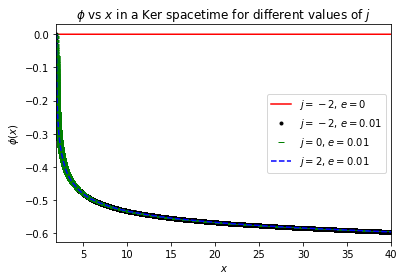

In [218]:
plt.plot(l, solsch2[:,2], 'r',label='$j=-2$, $e=0$')
plt.plot(l, solsch3[:,2], 'k.',label='$j=-2$, $e=0.01$')
plt.plot(l, solsch4[:,2], 'g_',label='$j=0$, $e=0.01$')
plt.plot(l, solsch5[:,2], 'b--',label='$j=2$, $e=0.01$')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Ker spacetime for different values of $j$')
plt.xlim([initial+2*h,25])
plt.legend()
plt.xlim([initial+2*h,end])
plt.show()

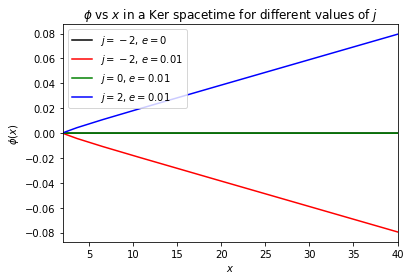

In [219]:
plt.plot(l, solsch2[:,4], 'k',label='$j=-2$, $e=0$')
plt.plot(l, solsch3[:,4], 'r',label='$j=-2$, $e=0.01$')
plt.plot(l, solsch4[:,4], 'g',label='$j=0$, $e=0.01$')
plt.plot(l, solsch5[:,4], 'b',label='$j=2$, $e=0.01$')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Ker spacetime for different values of $j$')
plt.xlim([initial+2*h,25])
plt.legend()
plt.xlim([initial+2*h,end])
plt.show()

In [220]:
#paramsch=(M,m,k,j,omega,theta,e,0,lam)
#paramsch2=(M,m,2,-2,omega,theta,0,0,lam)
#paramsch3=(M,m,2,-2,omega,theta,e,0,lam)
#paramsch4=(M,m,2,0,omega,theta,e,0,lam)
#paramsch5=(M,m,2,2,omega,theta,e,0,lam)
#paramsch6=(M,m,2,-2,omega,theta,e,0,lam)
#paramsch7=(M,m,2,0,omega,theta,e,0,lam)
#paramsch8=(M,m,2,2,omega,theta,e,0,lam)

Esch_mon,Asch_dip,dAsch_dip=real_emf(l,solsch[:,2],solsch[:,4],solsch[:,5])
Esch2_mon,Asch2_dip,dAsch2_dip=real_emf(l,solsch2[:,2],solsch2[:,4],solsch2[:,5])
Esch3_mon,Asch3_dip,dAsch3_dip=real_emf(l,solsch3[:,2],solsch3[:,4],solsch3[:,5])
Esch4_mon,Asch4_dip,dAsch4_dip=real_emf(l,solsch4[:,2],solsch4[:,4],solsch4[:,5])
Esch5_mon,Asch5_dip,dAsch5_dip=real_emf(l,solsch5[:,2],solsch5[:,4],solsch5[:,5])
Esch6_mon,Asch6_dip,dAsch6_dip=real_emf(l,solsch6[:,2],solsch6[:,4],solsch6[:,5])
Esch7_mon,Asch7_dip,dAsch7_dip=real_emf(l,solsch7[:,2],solsch7[:,4],solsch7[:,5])
Esch8_mon,Asch8_dip,dAsch8_dip=real_emf(l,solsch8[:,2],solsch8[:,4],solsch8[:,5])


Kinsch,Usch_E,Psch_E,psch,Usch_n,Usch_Q=Energy_Balance(l,solsch[:,0],M,m,k,j,omega,theta,e,0,lam,Esch_mon,Asch_dip,dAsch_dip,solsch[:,3])
Kinsch2,Usch2_E,Psch2_E,psch2,Usch2_n,Usch2_Q=Energy_Balance(l,solsch2[:,0],M,m,2,-2,omega,theta,0,0,lam,Esch2_mon,Asch2_dip,dAsch2_dip,solsch2[:,3])
Kinsch3,Usch3_E,Psch3_E,psch3,Usch3_n,Usch3_Q=Energy_Balance(l,solsch3[:,0],M,m,2,-2,omega,theta,e,0,lam,Esch3_mon,Asch3_dip,dAsch3_dip,solsch3[:,3])
Kinsch4,Usch4_E,Psch4_E,psch4,Usch4_n,Usch4_Q=Energy_Balance(l,solsch4[:,0],M,m,2,0,omega,theta,e,0,lam,Esch4_mon,Asch4_dip,dAsch4_dip,solsch4[:,3])
Kinsch5,Usch5_E,Psch5_E,psch5,Usch5_n,Usch5_Q=Energy_Balance(l,solsch5[:,0],M,m,2,2,omega,theta,e,0,lam,Esch5_mon,Asch5_dip,dAsch5_dip,solsch5[:,3])
Kinsch6,Usch6_E,Psch6_E,psch6,Usch6_n,Usch6_Q=Energy_Balance(l,solsch6[:,0],M,m,2,-2,omega,theta,e,0,lam,Esch6_mon,Asch6_dip,dAsch6_dip,solsch6[:,3])
Kinsch7,Usch7_E,Psch7_E,psch7,Usch7_n,Usch7_Q=Energy_Balance(l,solsch7[:,0],M,m,2,0,omega,theta,e,0,lam,Esch7_mon,Asch7_dip,dAsch7_dip,solsch7[:,3])
Kinsch8,Usch8_E,Psch8_E,psch8,Usch8_n,Usch8_Q=Energy_Balance(l,solsch8[:,0],M,m,2,2,omega,theta,e,0,lam,Esch8_mon,Asch8_dip,dAsch8_dip,solsch8[:,3])

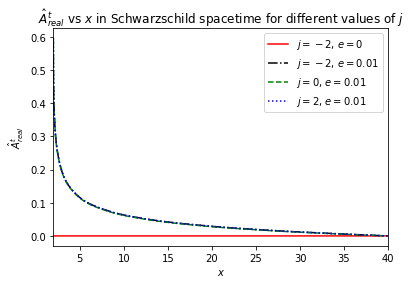

In [221]:
plt.plot(l, Esch2_mon, 'r-',label='$j=-2$, $e=0$')
plt.plot(l, Esch3_mon, 'k-.',label='$j=-2$, $e=0.01$')
plt.plot(l, Esch4_mon, 'g--',label='$j=0$, $e=0.01$')
plt.plot(l, Esch5_mon, 'b:',label='$j=2$, $e=0.01$')
plt.xlabel('$x$')
plt.ylabel('$\hat A^t_{real}$')
plt.title('$\hat A^t_{real}$ vs $x$ in Schwarzschild spacetime for different values of $j$')
plt.xlim([initial+2*h,25])
plt.legend()
plt.xlim([initial+2*h,40])
plt.show()

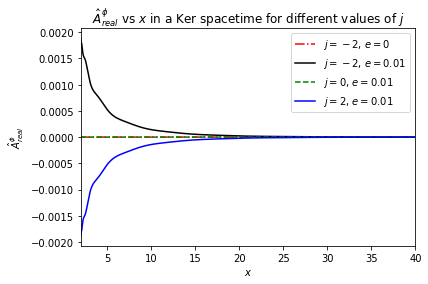

In [222]:
plt.plot(l, Asch2_dip, 'r-.',label='$j=-2$, $e=0$')
plt.plot(l, Asch3_dip, 'k',label='$j=-2$, $e=0.01$')
plt.plot(l, Asch4_dip, 'g--',label='$j=0$, $e=0.01$')
plt.plot(l, Asch5_dip, 'b',label='$j=2$, $e=0.01$')
plt.xlabel('$x$')
plt.ylabel('$\hat A^\phi_{real}$')
plt.title('$\hat A^\phi_{real}$ vs $x$ in a Ker spacetime for different values of $j$')
plt.legend()
plt.xlim([initial,40])
plt.show()

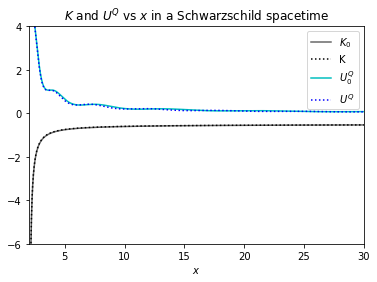

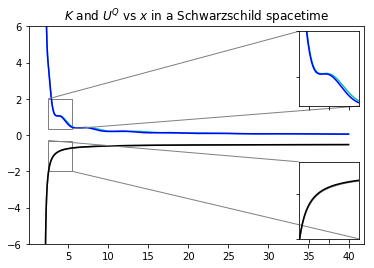

In [223]:
plt.plot(l, Kinsch2, color='0.4',label='$K_0$')
plt.plot(l, Kinsch3, 'k:',label='K')

plt.plot(l, Usch2_Q, color='c',label='$U^Q_0$')
plt.plot(l, Usch3_Q, 'b:',label='$U^Q$')
plt.xlabel('$x$')
plt.ylabel('')
plt.title('$K$ and $U^Q$ vs $x$ in a Schwarzschild spacetime')
plt.xlim([initial+2*h,30])
plt.ylim([-6,4])
plt.legend()
plt.show()

fig, ax = plt.subplots()

ax.plot(l, Kinsch2, color='0.4',label='$K_0$')
ax.plot(l, Kinsch3, color='k',label='K')
ax.plot(l, Usch2_Q,color='c',label='$U^Q_0$')
ax.plot(l, Usch3_Q,color='b',label='$U^Q$')
ax.set_ylim(-6, 6)
plt.title('$K$ and $U^Q$ vs $x$ in a Schwarzschild spacetime')

axins = zoomed_inset_axes(ax, 2.5, loc=1) # zoom = 6
axins.plot(l, Kinsch2, color='0.4',label='$K_0$')
axins.plot(l, Kinsch3, color='k',label='K')
axins.plot(l, Usch2_Q,color='c',label='$U^Q_0$')
axins.plot(l, Usch3_Q,color='b',label='$U^Q$')
axins.set_xlim(2.5, 5.5) # Limit the region for zoom
axins.set_ylim(0.35, 2)

plt.xticks(visible=False)  # Not present ticks
plt.yticks(visible=False)

axins2 = zoomed_inset_axes(ax, 2.5, loc=4) # zoom = 6
axins2.plot(l, Kinsch2, color='0.4',label='$K_0$')
axins2.plot(l, Kinsch3, color='k',label='K')
axins2.plot(l, Usch2_Q,color='c',label='$U^Q_0$')
axins2.plot(l, Usch3_Q,color='b',label='$U^Q$')
axins2.set_xlim(2.5, 5.5) # Limit the region for zoom
axins2.set_ylim(-2, -0.3)


plt.xticks(visible=False)  # Not present ticks
plt.yticks(visible=False)
#
## draw a bbox of the region of the inset axes in the parent axes and
## connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
mark_inset(ax, axins2, loc1=2, loc2=4, fc="none", ec="0.5")
plt.draw()
plt.show()

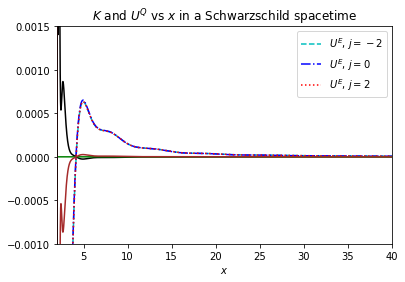

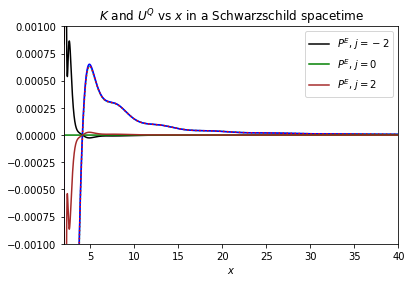

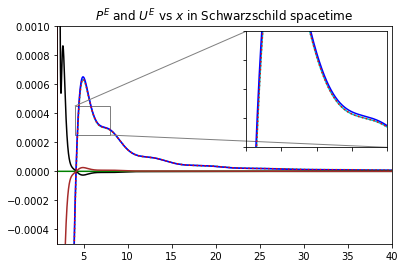

In [224]:
plt.plot(l, Usch3_E, 'c--',label='$U^E$, $j=-2$')
plt.plot(l, Usch4_E, 'b-.',label='$U^E$, $j=0$')
plt.plot(l, Usch5_E, 'r:',label='$U^E$, $j=2$')

plt.plot(l, Psch3_E, 'k')
plt.plot(l, Psch4_E, 'g')
plt.plot(l, Psch5_E, 'brown')

plt.xlabel('$x$')
plt.ylabel('')
plt.title('$K$ and $U^Q$ vs $x$ in a Schwarzschild spacetime')
plt.xlim([initial,end])
plt.ylim([-0.001,0.0015])
plt.legend()
plt.show()

plt.plot(l, Usch3_E, 'c')
plt.plot(l, Usch4_E, 'b')
plt.plot(l, Usch5_E, 'r:')

plt.plot(l, Psch3_E, 'k',label='$P^E$, $j=-2$')
plt.plot(l, Psch4_E, 'g',label='$P^E$, $j=0$')
plt.plot(l, Psch5_E, 'brown',label='$P^E$, $j=2$')

plt.xlabel('$x$')
plt.ylabel('')
plt.title('$K$ and $U^Q$ vs $x$ in a Schwarzschild spacetime')
plt.xlim([initial,end])
plt.ylim([-0.001,0.001])
plt.legend()
plt.show()

fig, ax = plt.subplots()

ax.plot(l, Usch3_E, 'c',label='$U^Q_0$')
ax.plot(l, Usch4_E, 'b',label='$U^Q_0$')
ax.plot(l, Usch5_E, 'r:',label='$U^Q_0$')

ax.plot(l, Psch3_E, 'k')
ax.plot(l, Psch4_E, 'g')
ax.plot(l, Psch5_E, 'brown')

ax.set_xlim(2,40)
ax.set_ylim(-0.0005,0.001)
plt.title('$P^E$ and $U^E$ vs $x$ in Schwarzschild spacetime')

axins = zoomed_inset_axes(ax, 4, loc=1) # zoom = 6

axins.plot(l, Usch3_E, 'c',label='$U^Q_0$')
axins.plot(l, Usch4_E, 'b',label='$U^Q_0$')
axins.plot(l, Usch5_E, 'r:',label='$U^Q_0$')

axins.set_xlim(4, 8) # Limit the region for zoom
axins.set_ylim(0.00025,0.00045)

plt.xticks(visible=False)  # Not present ticks
plt.yticks(visible=False)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.draw()
plt.show()

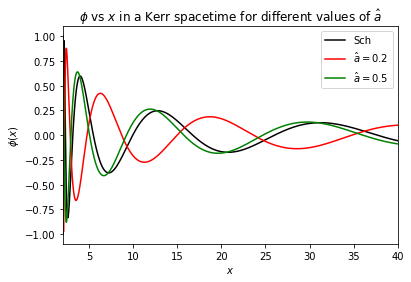

In [225]:
plt.plot(l, sol0[:,0], color='k',label='Sch')
plt.plot(l, sol07[:,0], color='r',label='$\hat a=0.2$')
plt.plot(l, sol08[:,0], color='g',label='$\hat a=0.5$')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Kerr spacetime for different values of $\hat a$')
plt.xlim([initial+2*h,25])
plt.legend()
plt.xlim([initial+2*h,end])
plt.show()

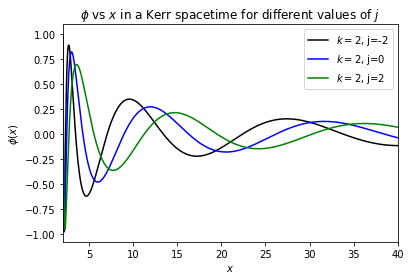

In [226]:
plt.plot(l, sol09[:,0], color='k',label='$k=2$, j=-2')
plt.plot(l, sol010[:,0],'b',label='$k=2$, j=0')
plt.plot(l, sol011[:,0], 'g',label='$k=2$, j=2')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Kerr spacetime for different values of $j$')
plt.legend()
plt.xlim([initial+2*h,end])
plt.show()

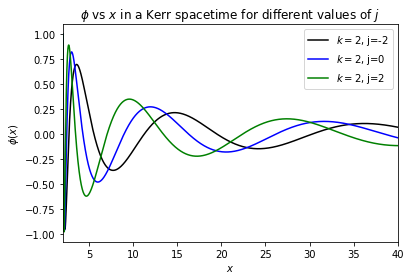

In [227]:
plt.plot(l, sol012[:,0], color='k',label='$k=2$, j=-2')
plt.plot(l, sol013[:,0],'b',label='$k=2$, j=0')
plt.plot(l, sol014[:,0], 'g',label='$k=2$, j=2')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Kerr spacetime for different values of $j$')
plt.legend()
plt.xlim([initial,end])
plt.show()

#ELECTROMAGNETIC CONTRIBUTION IN KERR GEOMETRY 

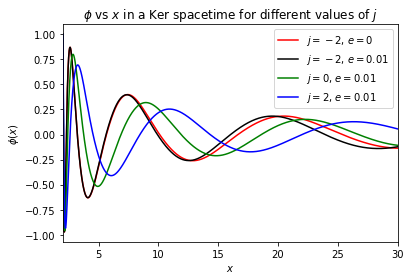

In [228]:
plt.plot(l, sol2[:,0], 'r',label='$j=-2$, $e=0$')
plt.plot(l, sol4[:,0], 'k',label='$j=-2$, $e=0.01$')
plt.plot(l, sol5[:,0], 'g',label='$j=0$, $e=0.01$')
plt.plot(l, sol6[:,0], 'b',label='$j=2$, $e=0.01$')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Ker spacetime for different values of $j$')
plt.xlim([initial+2*h,25])
plt.legend()
plt.xlim([initial+2*h,30])
plt.show()

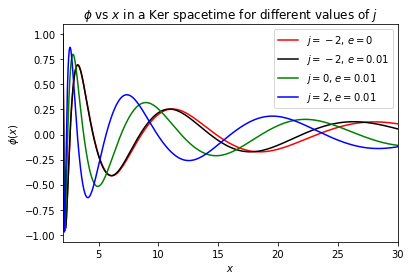

In [229]:
plt.plot(l, sol10[:,0], 'r',label='$j=-2$, $e=0$')
plt.plot(l, sol7[:,0], 'k',label='$j=-2$, $e=0.01$')
plt.plot(l, sol8[:,0], 'g',label='$j=0$, $e=0.01$')
plt.plot(l, sol9[:,0], 'b',label='$j=2$, $e=0.01$')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Ker spacetime for different values of $j$')
plt.xlim([initial+2*h,25])
plt.legend()
plt.xlim([initial+2*h,30])
plt.show()

In [230]:
#params=(M,m,k,j,omega,theta,e,alp,lam)
#params1=(M,m,k,j,omega,theta,e,0.2,lam)
#params2=(M,m,2,-2,omega,theta,0,0.3,lam)
#params3=(M,m,k,j,omega,theta,e,0.9,lam)
#params4=(M,m,2,-2,omega,theta,e,0.3,lam)
#params5=(M,m,2,0,omega,theta,e,0.3,lam)
#params6=(M,m,2,2,omega,theta,e,0.3,lam)
#params7=(M,m,2,-2,omega,theta,e,-0.3,lam)
#params8=(M,m,2,0,omega,theta,e,-0.3,lam)
#params9=(M,m,2,2,omega,theta,e,-0.3,lam)
#params10=(M,m,2,-2,omega,theta,0,-0.3,lam)

E_mon,A_dip,dA_dip=real_emf(l,sol[:,2],sol[:,4],sol[:,5])
E1_mon,A1_dip,dA1_dip=real_emf(l,sol1[:,2],sol1[:,4],sol1[:,5])
E2_mon,A2_dip,dA2_dip=real_emf(l,sol2[:,2],sol2[:,4],sol2[:,5])
E3_mon,A3_dip,dA3_dip=real_emf(l,sol3[:,2],sol3[:,4],sol3[:,5])
E4_mon,A4_dip,dA4_dip=real_emf(l,sol4[:,2],sol4[:,4],sol4[:,5])
E5_mon,A5_dip,dA5_dip=real_emf(l,sol5[:,2],sol5[:,4],sol5[:,5])
E6_mon,A6_dip,dA6_dip=real_emf(l,sol6[:,2],sol6[:,4],sol6[:,5])
E7_mon,A7_dip,dA7_dip=real_emf(l,sol7[:,2],sol7[:,4],sol7[:,5])
E8_mon,A8_dip,dA8_dip=real_emf(l,sol8[:,2],sol8[:,4],sol8[:,5])
E9_mon,A9_dip,dA9_dip=real_emf(l,sol9[:,2],sol9[:,4],sol9[:,5])
E10_mon,A10_dip,dA10_dip=real_emf(l,sol10[:,2],sol10[:,4],sol10[:,5])


Kin,U_E,P_E,p,U_n,U_Q=Energy_Balance(l,sol[:,0],M,m,k,j,omega,theta,e,alp,lam,E_mon,A_dip,dA_dip,sol[:,3])
Kin1,U1_E,P1_E,p1,U1_n,U1_Q=Energy_Balance(l,sol1[:,0],M,m,k,j,omega,theta,e,0.2,lam,E1_mon,A1_dip,dA1_dip,sol1[:,3])
Kin2,U2_E,P2_E,p2,U2_n,U2_Q=Energy_Balance(l,sol2[:,0],M,m,2,-2,omega,theta,0,0.3,lam,E2_mon,A2_dip,dA2_dip,sol2[:,3])
Kin3,U3_E,P3_E,p3,U3_n,U3_Q=Energy_Balance(l,sol3[:,0],M,m,k,j,omega,theta,e,0.9,lam,E3_mon,A3_dip,dA3_dip,sol3[:,3])
Kin4,U4_E,P4_E,p4,U4_n,U4_Q=Energy_Balance(l,sol4[:,0],M,m,2,-2,omega,theta,e,0.3,lam,E4_mon,A4_dip,dA4_dip,sol4[:,3])
Kin5,U5_E,P5_E,p5,U5_n,U5_Q=Energy_Balance(l,sol5[:,0],M,m,2,0,omega,theta,e,0.3,lam,E5_mon,A5_dip,dA5_dip,sol5[:,3])
Kin6,U6_E,P6_E,p6,U6_n,U6_Q=Energy_Balance(l,sol6[:,0],M,m,2,2,omega,theta,e,0.3,lam,E6_mon,A6_dip,dA6_dip,sol6[:,3])
Kin7,U7_E,P7_E,p7,U7_n,U7_Q=Energy_Balance(l,sol7[:,0],M,m,2,-2,omega,theta,e,-0.3,lam,E7_mon,A7_dip,dA7_dip,sol7[:,3])
Kin8,U8_E,P8_E,p8,U8_n,U8_Q=Energy_Balance(l,sol8[:,0],M,m,2,0,omega,theta,e,-0.3,lam,E8_mon,A8_dip,dA8_dip,sol8[:,3])
Kin9,U9_E,P9_E,p9,U9_n,U9_Q=Energy_Balance(l,sol9[:,0],M,m,2,2,omega,theta,e,-0.3,lam,E9_mon,A9_dip,dA9_dip,sol9[:,3])
Kin10,U10_E,P10_E,p10,U10_n,U10_Q=Energy_Balance(l,sol10[:,0],M,m,2,-2,omega,theta,0,-0.3,lam,E10_mon,A10_dip,dA10_dip,sol10[:,3])


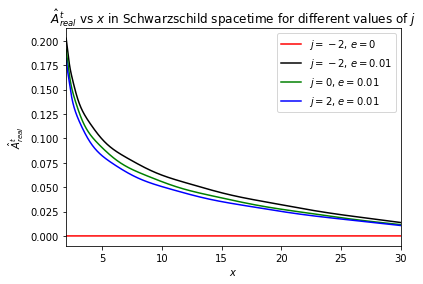

In [231]:
plt.plot(l, E2_mon, 'r',label='$j=-2$, $e=0$')
plt.plot(l, E4_mon, 'k',label='$j=-2$, $e=0.01$')
plt.plot(l, E5_mon, 'g',label='$j=0$, $e=0.01$')
plt.plot(l, E6_mon, 'b',label='$j=2$, $e=0.01$')
plt.xlabel('$x$')
plt.ylabel('$\hat A^t_{real}$')
plt.title('$\hat A^t_{real}$ vs $x$ in Schwarzschild spacetime for different values of $j$')
plt.xlim([initial+2*h,25])
plt.legend()
plt.xlim([initial+2*h,30])
plt.show()

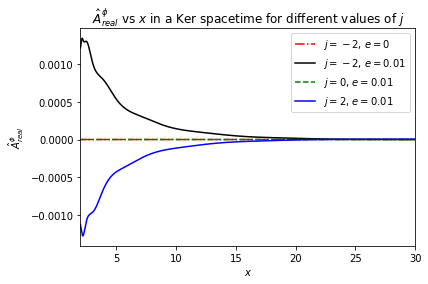

In [232]:
plt.plot(l, A2_dip, 'r-.',label='$j=-2$, $e=0$')
plt.plot(l, A4_dip, 'k',label='$j=-2$, $e=0.01$')
plt.plot(l, A5_dip, 'g--',label='$j=0$, $e=0.01$')
plt.plot(l, A6_dip, 'b',label='$j=2$, $e=0.01$')
plt.xlabel('$x$')
plt.ylabel('$\hat A^\phi_{real}$')
plt.title('$\hat A^\phi_{real}$ vs $x$ in a Ker spacetime for different values of $j$')
plt.legend()
plt.xlim([initial,30])
plt.show()

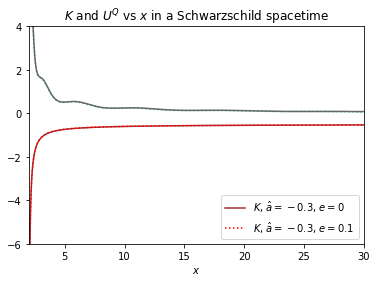

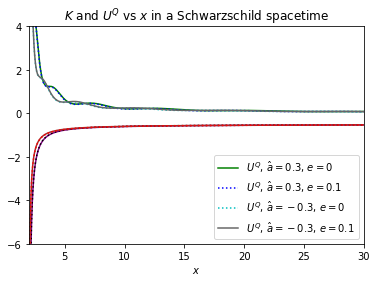

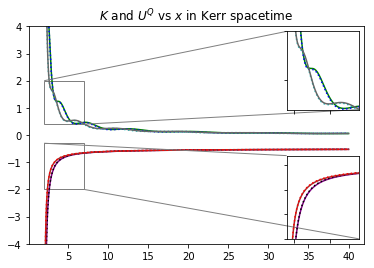

In [270]:
#plt.plot(l, Kin2, 'purple',label='$K$, $\hat a=0.3$, $e=0$')
#plt.plot(l, Kin4, 'k:',label='$K$, $\hat a=0.3$, $e=0.1$')
plt.plot(l, Kin10, color='brown',label='$K$, $\hat a=-0.3$, $e=0$')
plt.plot(l, Kin7, 'r:',label='$K$, $\hat a=-0.3$, $e=0.1$')

#plt.plot(l, U2_Q, 'g')
#plt.plot(l, U4_Q, 'b:')
plt.plot(l, U7_Q, 'c:')
plt.plot(l, U10_Q, '0.4')

plt.xlabel('$x$')
plt.ylabel('')
plt.title('$K$ and $U^Q$ vs $x$ in a Schwarzschild spacetime')
plt.xlim([initial+2*h,30])
plt.ylim([-6,4])
plt.legend()
plt.show()

plt.plot(l, Kin2, 'purple')
plt.plot(l, Kin4, 'k:')
plt.plot(l, Kin7, color='brown')
plt.plot(l, Kin10, 'r:')

plt.plot(l, U2_Q, color='g',label='$U^Q$, $\hat a=0.3$, $e=0$')
plt.plot(l, U4_Q, 'b:',label='$U^Q$, $\hat a=0.3$, $e=0.1$')
plt.plot(l, U7_Q, 'c:',label='$U^Q$, $\hat a=-0.3$, $e=0$')
plt.plot(l, U10_Q, '0.4',label='$U^Q$, $\hat a=-0.3$, $e=0.1$')

plt.xlabel('$x$')
plt.ylabel('')
plt.title('$K$ and $U^Q$ vs $x$ in a Schwarzschild spacetime')
plt.xlim([initial+2*h,30])
plt.ylim([-6,4])
plt.legend()
plt.show()



fig, ax = plt.subplots()

ax.plot(l, Kin2, 'purple',label='$K$, $\hat a=0.3$, $e=0$')
ax.plot(l, Kin4, 'k:',label='$K$, $\hat a=0.3$, $e=0.1$')
ax.plot(l, Kin10, color='brown',label='$K$, $\hat a=-0.3$, $e=0$')
ax.plot(l, Kin7, 'r:',label='$K$, $\hat a=-0.3$, $e=0.1$')

ax.plot(l, U2_Q, 'g')
ax.plot(l, U4_Q, 'b:')
ax.plot(l, U7_Q, 'c:')
ax.plot(l, U10_Q, '0.4')

ax.set_ylim(-4, 4)
plt.title('$K$ and $U^Q$ vs $x$ in Kerr spacetime')

axins = zoomed_inset_axes(ax, 1.8, loc=1) # zoom = 6

axins.plot(l, U2_Q, color='g',label='$U^Q$, $\hat a=0.3$, $e=0$')
axins.plot(l, U4_Q, 'b:',label='$U^Q$, $\hat a=0.3$, $e=0.1$')
axins.plot(l, U7_Q, 'c:',label='$U^Q$, $\hat a=-0.3$, $e=0$')
axins.plot(l, U10_Q, '0.4',label='$U^Q$, $\hat a=-0.3$, $e=0.1$')

axins.set_xlim(2, 7) # Limit the region for zoom
axins.set_ylim(0.4, 2)

plt.xticks(visible=False)  # Not present ticks
plt.yticks(visible=False)

axins2 = zoomed_inset_axes(ax, 1.8, loc=4) # zoom = 6
axins2.plot(l, Kin2, 'purple',label='$K$, $\hat a=0.3$, $e=0$')
axins2.plot(l, Kin4, 'k:',label='$K$, $\hat a=0.3$, $e=0.1$')
axins2.plot(l, Kin10, color='brown',label='$K$, $\hat a=-0.3$, $e=0$')
axins2.plot(l, Kin7, 'r:',label='$K$, $\hat a=-0.3$, $e=0.1$')

axins2.set_xlim(2, 7) # Limit the region for zoom
axins2.set_ylim(-2, -0.3)


plt.xticks(visible=False)  # Not present ticks
plt.yticks(visible=False)
#
## draw a bbox of the region of the inset axes in the parent axes and
## connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
mark_inset(ax, axins2, loc1=2, loc2=4, fc="none", ec="0.5")
plt.draw()
plt.show()

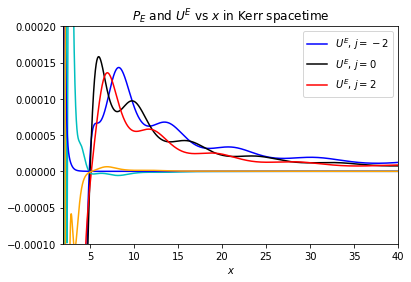

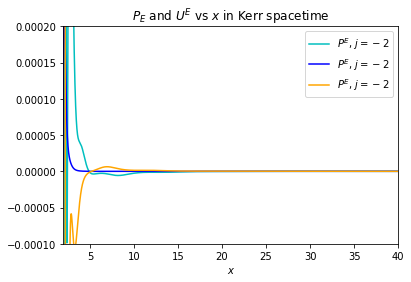

In [317]:
plt.plot(l, U4_E, 'b',label='$U^E$, $j=-2$')
plt.plot(l, U5_E, 'k',label='$U^E$, $j=0$')
plt.plot(l, U6_E, 'r',label='$U^E$, $j=2$')
#plt.plot(l, U7_E, 'g-.',label='$U^E$, $j=2$')
#plt.plot(l, U9_E, 'b-.',label='$U^E$, $j=2$')

plt.plot(l, P4_E, 'c')
plt.plot(l, P5_E, 'b')
plt.plot(l, P6_E, 'orange')


plt.xlabel('$x$')
plt.ylabel('')
plt.title('$P_E$ and $U^E$ vs $x$ in Kerr spacetime')
plt.xlim([initial,end])
plt.ylim([-0.0001,0.0002])
plt.legend()
plt.show()

plt.plot(l, P4_E, 'c',label='$P^E$, $j=-2$')
plt.plot(l, P5_E, 'b',label='$P^E$, $j=-2$')
plt.plot(l, P6_E, 'orange',label='$P^E$, $j=-2$')


plt.xlabel('$x$')
plt.ylabel('')
plt.title('$P_E$ and $U^E$ vs $x$ in Kerr spacetime')
plt.xlim([initial,end])
plt.ylim([-0.0001,0.0002])
plt.legend()
plt.show()

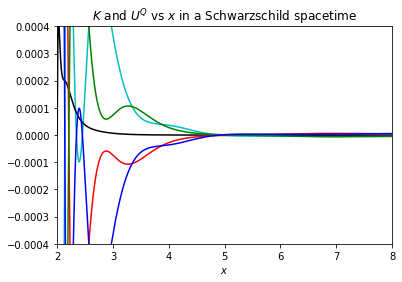

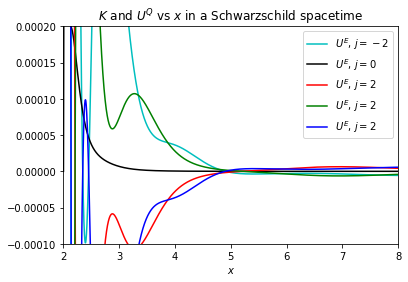

In [310]:
plt.plot(l, P4_E, 'c')
plt.plot(l, P5_E, 'k')
plt.plot(l, P6_E, 'r')
plt.plot(l, P7_E, 'g')
plt.plot(l, P9_E, 'b')

plt.xlabel('$x$')
plt.ylabel('')
plt.title('$K$ and $U^Q$ vs $x$ in a Schwarzschild spacetime')
plt.xlim([initial,8])
plt.ylim([-0.0004,0.0004])
plt.legend()
plt.show()


plt.plot(l, P4_E, 'c',label='$U^E$, $j=-2$')
plt.plot(l, P5_E, 'k',label='$U^E$, $j=0$')
plt.plot(l, P6_E, 'r',label='$U^E$, $j=2$')
plt.plot(l, P7_E, 'g',label='$U^E$, $j=2$')
plt.plot(l, P9_E, 'b',label='$U^E$, $j=2$')

plt.xlabel('$x$')
plt.ylabel('')
plt.title('$K$ and $U^Q$ vs $x$ in a Schwarzschild spacetime')
plt.xlim([initial,8])
plt.ylim([-0.0001,0.0002])
plt.legend()
plt.show()

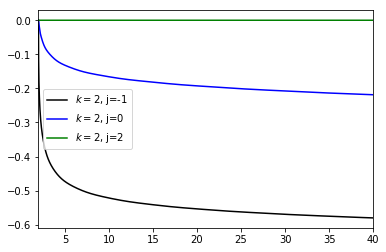

[  0.00000000e+00  -4.07347430e-07  -1.62055029e-06 ...,  -1.82039840e-01
  -1.82040111e-01  -1.82040382e-01]


In [234]:
plt.plot(l, sol[:,2], color='k',label='$k=2$, j=-1')
plt.plot(l, sol1[:,2],'b',label='$k=2$, j=0')
plt.plot(l, sol2[:,2], 'g',label='$k=2$, j=2')
#plt.xlabel('$x$')
#plt.ylabel('$\phi(x)$')
#plt.title('$\phi$ vs $x$ in a Kerr spacetime for different values of $j$')
plt.legend()
plt.xlim([initial+2*h,end])
plt.show()
print sol7[:,2]

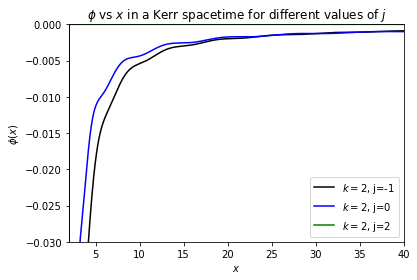

[ 0.         -0.00320715 -0.00636203 ..., -0.00107149 -0.00107149
 -0.0010715 ]


In [235]:
plt.plot(l, sol[:,3], color='k',label='$k=2$, j=-1')
plt.plot(l, sol1[:,3],'b',label='$k=2$, j=0')
plt.plot(l, sol2[:,3], 'g',label='$k=2$, j=2')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Kerr spacetime for different values of $j$')
plt.legend()
plt.xlim([initial+2*h,end])
plt.ylim([-0.03,0])
plt.show()
print sol7[:,3]

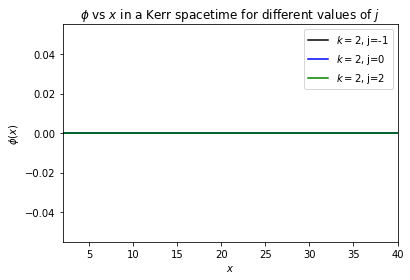

[  0.00000000e+00  -3.28979992e-11  -1.63418629e-10 ...,  -5.07051764e-02
  -5.07055069e-02  -5.07058374e-02]


In [236]:
plt.plot(l, sol[:,4], color='k',label='$k=2$, j=-1')
plt.plot(l, sol1[:,4],'b',label='$k=2$, j=0')
plt.plot(l, sol2[:,4], 'g',label='$k=2$, j=2')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Kerr spacetime for different values of $j$')
plt.legend()
plt.xlim([initial+2*h,end])
plt.show()
print sol7[:,4]

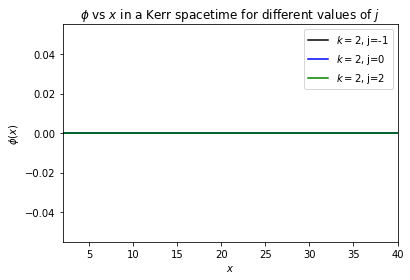

[  0.00000000e+00  -3.28979992e-11  -1.63418629e-10 ...,  -5.07051764e-02
  -5.07055069e-02  -5.07058374e-02]


In [237]:
plt.plot(l, sol[:,5], color='k',label='$k=2$, j=-1')
plt.plot(l, sol1[:,5],'b',label='$k=2$, j=0')
plt.plot(l, sol2[:,5], 'g',label='$k=2$, j=2')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.title('$\phi$ vs $x$ in a Kerr spacetime for different values of $j$')
plt.legend()
plt.xlim([2,end])
plt.show()
print sol7[:,4]

In [238]:
E_mon,A_dip,dA_dip=real_emf(l,sol6[:,2],sol6[:,4],sol6[:,5])


Kin,U_E,P_E,p,U_n,U_Q=Energy_Balance(l,sol6[:,0],M,m,2,2,omega,theta,e,0.3,lam,E_mon,A_dip,dA_dip,sol6[:,3])


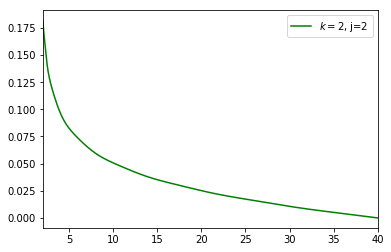

In [239]:
plt.plot(l, E_mon, 'g',label='$k=2$, j=2')
plt.legend()
plt.xlim([initial+2*h,end])
plt.show()

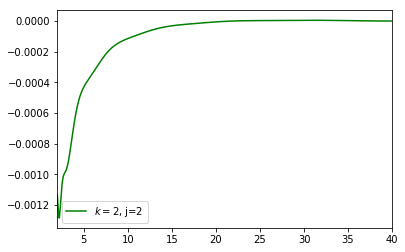

In [240]:
plt.plot(l, A_dip, 'g',label='$k=2$, j=2')
plt.legend()
plt.xlim([initial+2*h,end])
plt.show()

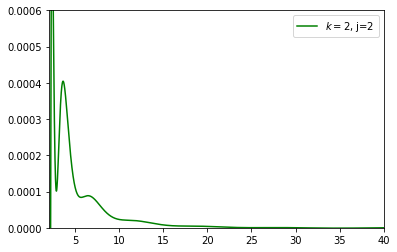

In [241]:
plt.plot(l, dA_dip, 'g',label='$k=2$, j=2')
plt.legend()
plt.xlim([initial+2*h,end])
plt.ylim([0,0.0006])

plt.show()

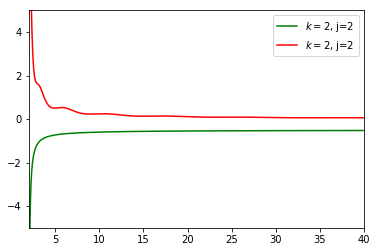

In [242]:
plt.plot(l, Kin, 'g',label='$k=2$, j=2')
plt.plot(l, U_Q, 'r',label='$k=2$, j=2')

plt.legend()
plt.xlim([initial+2*h,end])
plt.ylim([-5,5])
plt.show()

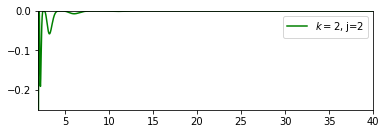

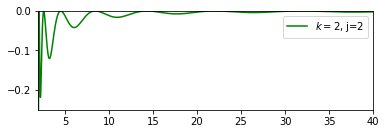

In [243]:
plt.subplot(2,1,1)
plt.plot(l, p, 'g',label='$k=2$, j=2')

plt.legend()
plt.xlim([initial+2*h,end])
plt.ylim([-0.25,0])
plt.show()

plt.subplot(2,1,1)
plt.plot(l, U_n, 'g',label='$k=2$, j=2')

plt.legend()
plt.xlim([initial+2*h,end])
plt.ylim([-0.25,0])
plt.show()

[  3.97750822e-03   3.98642354e-03   3.99452264e-03 ...,  -7.72365872e-12
  -6.41804599e-12  -5.11255852e-12]
[ -4.06059044e-04  -2.85223404e-03  -5.25660558e-03 ...,   8.72601800e-06
   8.72606626e-06   8.72611450e-06]


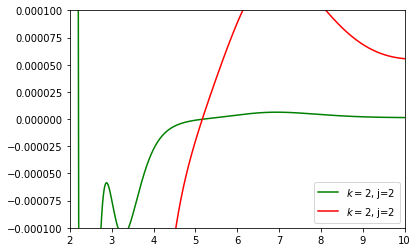

In [244]:
plt.plot(l, P_E, 'g',label='$k=2$, j=2')
plt.plot(l, U_E, 'r',label='$k=2$, j=2')

print P_E
print U_E
plt.legend()
plt.xlim([initial+2*h,10])
plt.ylim([-0.0001,0.0001])
plt.show()